# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. 
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

In [5]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)



In [6]:
BAC = data.DataReader("BAC","yahoo")
Citi = data.DataReader("C", "yahoo")
Goldman = data.DataReader("GS", "yahoo")
JPM = data.DataReader("JPM", "yahoo")
MS = data.DataReader("MS", "yahoo")
WFC = data.DataReader("WFC", "yahoo")


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [7]:
tickers = ['BAC','Citi','Goldman','JPM','MS','WFC']
tickers

['BAC', 'Citi', 'Goldman', 'JPM', 'MS', 'WFC']

** Create a single data frame by concatinating all the bank data frames use pd.concat 

In [9]:
bank_stocks = pd.concat(objs=[BAC,Citi,Goldman,JPM,MS,WFC], keys=tickers, axis=1)
bank_stocks.head()

BAC                                                    Citi  \
             High    Low   Open  Close       Volume  Adj Close       High   
Date                                                                        
2016-06-21  13.65  13.45  13.62  13.62   73810800.0  12.319476  43.209999   
2016-06-22  13.78  13.59  13.60  13.61   77980500.0  12.310431  43.430000   
2016-06-23  14.05  13.82  13.84  14.04   82494600.0  12.699373  44.500000   
2016-06-24  13.44  12.97  13.05  13.00  231499200.0  11.758680  41.389999   
2016-06-27  12.77  12.05  12.77  12.18  250847700.0  11.016978  39.639999   

                                             ...         MS             \
                  Low       Open      Close  ...       Open      Close   
Date                                         ...                         
2016-06-21  42.470001  43.169998  42.919998  ...  26.059999  26.200001   
2016-06-22  42.639999  42.869999  42.680000  ...  26.230000  26.389999   
2016-06-23  43.470001  43.509998  44.459999  ...  26.930000  27.290001   
2016-06-24  40.259998  40.630001  40.299999  ...  25.070000  24.520000   
2016-06-27  38.310001  39.580002  38.480000  ...  24.049999  23.610001   

                                         WFC                                   \
                Volume  Adj Close       High        Low       Open      Close   
Date                                                                            
2016-06-21  12357100.0  23.198797  47.340000  46.770000  47.290001  47.230000   
2016-06-22  14542900.0  23.367031  47.580002  46.930000  47.150002  46.970001   
2016-06-23  18027200.0  24.163939  47.910000  47.389999  47.639999  47.910000   
2016-06-24  49311900.0  21.711239  46.970001  45.279999  45.759998  45.709999   
2016-06-27  25434000.0  20.905483  45.330002  44.500000  45.200001  45.009998   

                                   
                Volume  Adj Close  
Date                               
2016-06-21  11731600.0  40.360729  
2016-06-22  17072100.0  40.138554  
2016-06-23  16270000.0  40.941830  
2016-06-24  46744100.0  39.061806  
2016-06-27  35030100.0  38.463615  

[5 rows x 36 columns]

** Set the column name levels **

In [11]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks.head()

Bank Ticker    BAC                                                    Citi  \
Stock Info    High    Low   Open  Close       Volume  Adj Close       High   
Date                                                                         
2016-06-21   13.65  13.45  13.62  13.62   73810800.0  12.319476  43.209999   
2016-06-22   13.78  13.59  13.60  13.61   77980500.0  12.310431  43.430000   
2016-06-23   14.05  13.82  13.84  14.04   82494600.0  12.699373  44.500000   
2016-06-24   13.44  12.97  13.05  13.00  231499200.0  11.758680  41.389999   
2016-06-27   12.77  12.05  12.77  12.18  250847700.0  11.016978  39.639999   

Bank Ticker                                   ...         MS             \
Stock Info         Low       Open      Close  ...       Open      Close   
Date                                          ...                         
2016-06-21   42.470001  43.169998  42.919998  ...  26.059999  26.200001   
2016-06-22   42.639999  42.869999  42.680000  ...  26.230000  26.389999   
2016-06-23   43.470001  43.509998  44.459999  ...  26.930000  27.290001   
2016-06-24   40.259998  40.630001  40.299999  ...  25.070000  24.520000   
2016-06-27   38.310001  39.580002  38.480000  ...  24.049999  23.610001   

Bank Ticker                               WFC                        \
Stock Info       Volume  Adj Close       High        Low       Open   
Date                                                                  
2016-06-21   12357100.0  23.198797  47.340000  46.770000  47.290001   
2016-06-22   14542900.0  23.367031  47.580002  46.930000  47.150002   
2016-06-23   18027200.0  24.163939  47.910000  47.389999  47.639999   
2016-06-24   49311900.0  21.711239  46.970001  45.279999  45.759998   
2016-06-27   25434000.0  20.905483  45.330002  44.500000  45.200001   

Bank Ticker                                    
Stock Info       Close      Volume  Adj Close  
Date                                           
2016-06-21   47.230000  11731600.0  40.360729  
2016-06-22   46.970001  17072100.0  40.138554  
2016-06-23   47.910000  16270000.0  40.941830  
2016-06-24   45.709999  46744100.0  39.061806  
2016-06-27   45.009998  35030100.0  38.463615  

[5 rows x 36 columns]

In [12]:
new_df= bank_stocks.xs(key='Close',axis=1, level = 1).max()
new_df

Bank Ticker
BAC         43.270000
Citi        81.910004
Goldman    391.450012
JPM        166.440002
MS          93.959999
WFC         65.930000
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [13]:
returns = pd.DataFrame()

In [14]:
for tick in tickers:
    returns[tick+' Return']= bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,Citi Return,Goldman Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2016-06-21,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-22,-0.000734,-0.005592,-0.001416,-0.003813,0.007252,-0.005505
2016-06-23,0.031594,0.041706,0.030512,0.021368,0.034104,0.020013
2016-06-24,-0.074074,-0.093567,-0.070745,-0.069477,-0.101502,-0.045919
2016-06-27,-0.063077,-0.045161,-0.016566,-0.033389,-0.037113,-0.015314


** Create a pairplot using seaborn of the returns dataframe **

C:\Users\npkal\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\npkal\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


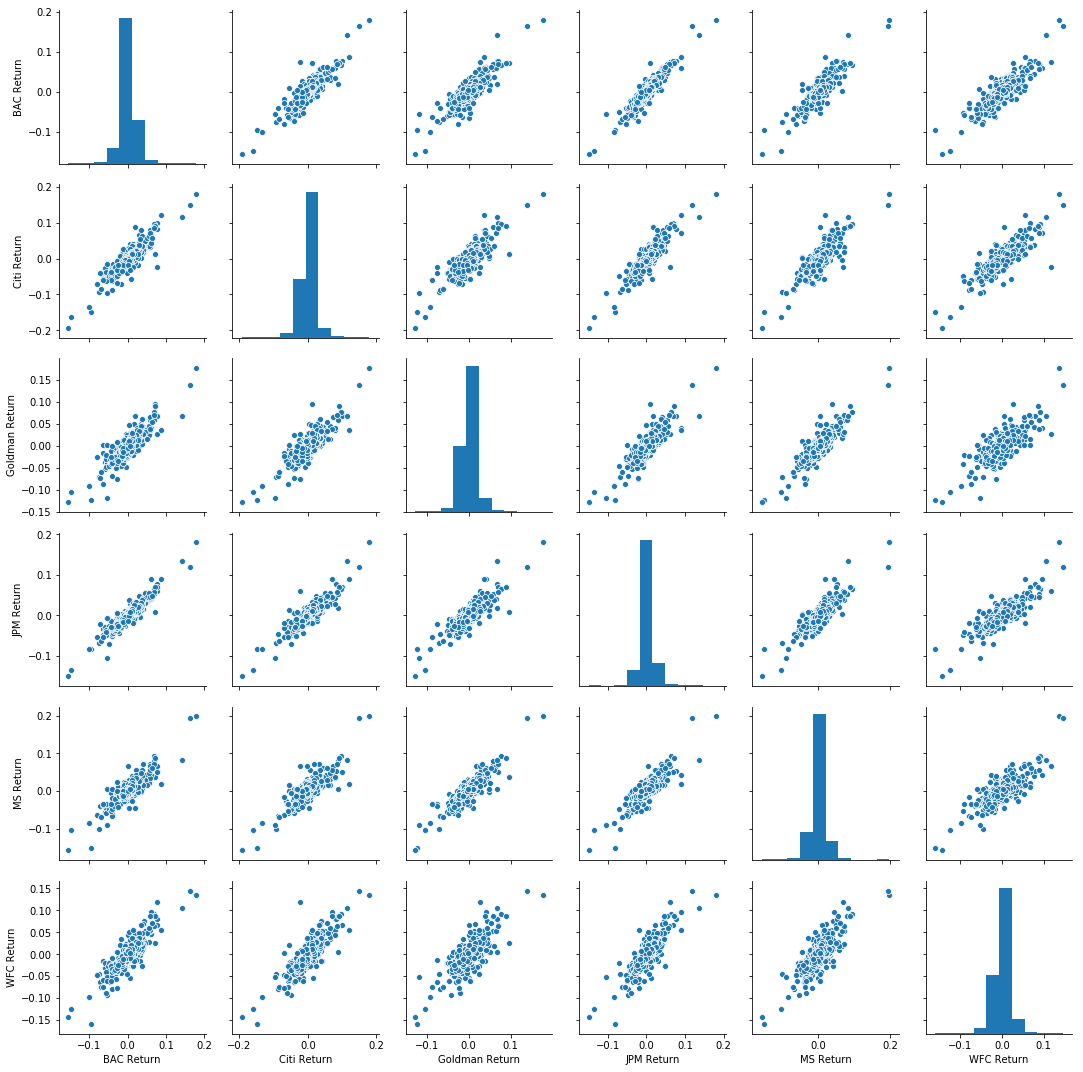

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
g = sns.pairplot(returns)

* See solution for details about Citigroup behavior....

Check the worst closing price for each bank stock

In [16]:
returns.idxmin()

BAC Return       2020-03-16
Citi Return      2020-03-16
Goldman Return   2020-03-16
JPM Return       2020-03-16
MS Return        2020-03-16
WFC Return       2020-03-12
dtype: datetime64[ns]

Check the best closing price for each bank stock

In [17]:
returns.idxmax()

BAC Return       2020-03-13
Citi Return      2020-03-13
Goldman Return   2020-03-13
JPM Return       2020-03-13
MS Return        2020-03-13
WFC Return       2020-03-24
dtype: datetime64[ns]

** Check the standard deviation of the returns and which stock is the riskiest over the entire time period **

In [18]:
returns.std()

BAC Return        0.021503
Citi Return       0.023299
Goldman Return    0.019921
JPM Return        0.018986
MS Return         0.021493
WFC Return        0.021637
dtype: float64

** which stock is the riskiest over the year 2016 **

In [19]:
returns.loc['2016-01-01':'2016-12-31'].std()

BAC Return        0.017927
Citi Return       0.016853
Goldman Return    0.015349
JPM Return        0.013227
MS Return         0.017888
WFC Return        0.014785
dtype: float64

** Create a distplot using seaborn of the 2016 returns for Morgan Stanley **

C:\Users\npkal\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\npkal\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


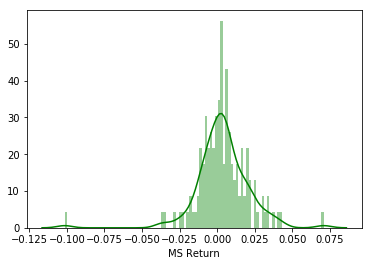

In [20]:
sns.distplot(returns.loc['2016-01-01':'2016-12-31']['MS Return'],color='green',bins=100)

** Create a distplot using seaborn of the 2016 returns for CitiGroup **

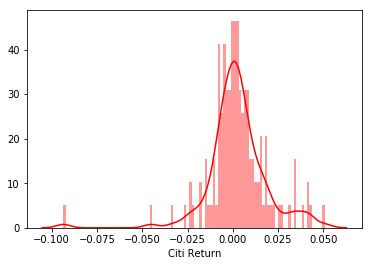

In [21]:
sns.distplot(returns.loc['2016-01-01':'2016-12-31']['Citi Return'],color='red',bins=100)

____
# More Visualization



In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time.

In [23]:
closeprice = bank_stocks.xs(key='Close', axis = 1, level = 1)
closeprice.head()

Bank Ticker,BAC,Citi,Goldman,JPM,MS,WFC
Date,,,,,,
2016-06-21,13.62,42.919998,148.350006,62.950001,26.200001,47.230000
2016-06-22,13.61,42.680000,148.139999,62.709999,26.389999,46.970001
2016-06-23,14.04,44.459999,152.660004,64.050003,27.290001,47.910000
2016-06-24,13.00,40.299999,141.860001,59.599998,24.520000,45.709999
2016-06-27,12.18,38.480000,139.509995,57.610001,23.610001,45.009998


C:\Users\npkal\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



Text(0.5, 0, 'Date')

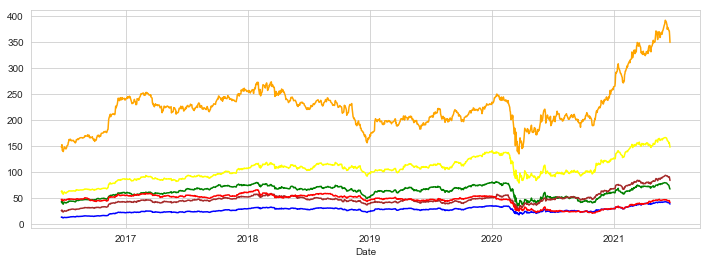

In [24]:
fig, ax = plt.subplots(figsize=(12,4))

ax.plot(closeprice.index, closeprice['BAC'], color = "blue")
ax.plot(closeprice.index, closeprice['Citi'], color= "green")
ax.plot(closeprice.index, closeprice['Goldman'], color= "orange")
ax.plot(closeprice.index, closeprice['JPM'], color= "yellow")
ax.plot(closeprice.index, closeprice['MS'], color= "brown")
ax.plot(closeprice.index, closeprice['WFC'], color= "red")

ax.set_xlabel('Date')

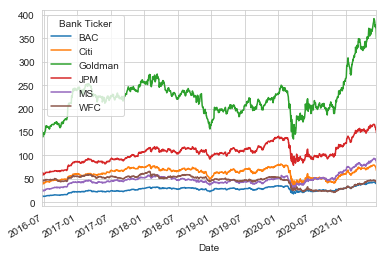

In [25]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [26]:
# plotly
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2016. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2016**

In [28]:
closeprice = bank_stocks.xs(key='Close', axis = 1, level = 1).loc['2016-01-01':'2016-12-31']
closeprice.head()

Bank Ticker,BAC,Citi,Goldman,JPM,MS,WFC
Date,,,,,,
2016-06-21,13.62,42.919998,148.350006,62.950001,26.200001,47.230000
2016-06-22,13.61,42.680000,148.139999,62.709999,26.389999,46.970001
2016-06-23,14.04,44.459999,152.660004,64.050003,27.290001,47.910000
2016-06-24,13.00,40.299999,141.860001,59.599998,24.520000,45.709999
2016-06-27,12.18,38.480000,139.509995,57.610001,23.610001,45.009998


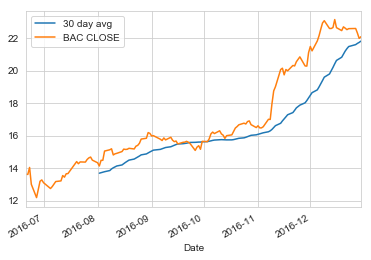

In [29]:
BAC['Close'].loc['2016-01-01':'2016-12-31'].rolling(window=30).mean().plot(label='30 day avg')
BAC['Close'].loc['2016-01-01':'2016-12-31'].plot(label = 'BAC CLOSE')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

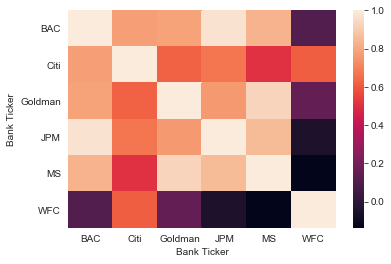

In [30]:
closeprice = bank_stocks.xs(key='Close', axis = 1, level = 1).corr()
closeprice
sns.heatmap(closeprice)

** Create seaborn's clustermap to cluster the correlations together:**

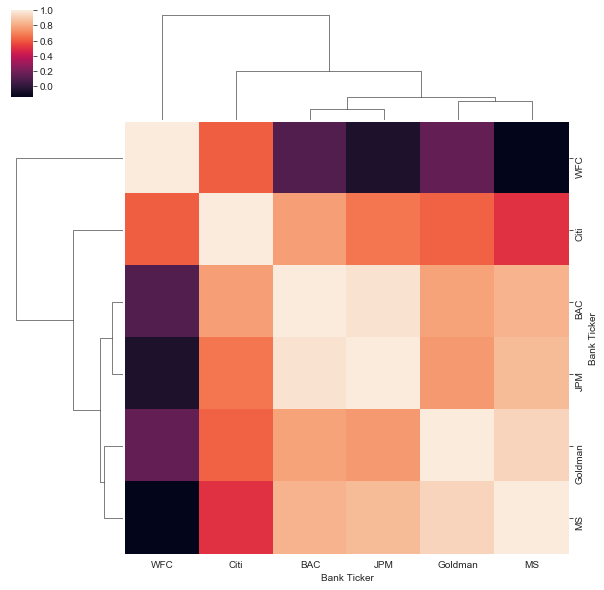

In [31]:
sns.clustermap(closeprice)

In [32]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

In this second part of the project we will rely on the 
cufflinks library to create some Technical Analysis plots. 

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2016 to Jan 1st 2017.**

In [33]:
BAC[['Open', 'High', 'Low', 'Close']].ix['2016-01-01':'2017-01-01'].iplot(kind='candle')

C:\Users\npkal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



** create a Simple Moving Averages plot of Morgan Stanley for the year 2016.**

In [34]:
MS['Close'].ix['2016-01-01':'2017-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

C:\Users\npkal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



**  create a Bollinger Band Plot for Bank of America for the year 2016.**

In [35]:
BAC[['Close']].ix['2016-01-01':'2017-01-01'].ta_plot(study='boll',title ='Bollinger Band Plot')

C:\Users\npkal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

